#                                       AirBnB and Zillow Analysis
Analysis to find the zip codes in New York City which would make the highest profit on short-term rentals.

##                                         Data Loading- AirBnB

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle, islice
import matplotlib.patches as mpatches
import matplotlib.patches as patches
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)  
pd.options.mode.chained_assignment = None  # default='warn'

files = ["listings file 1 of 4.csv", "listings file 2 of 4.csv", "listings file 3 of 4.csv", 
         "listings file 4 of 4.csv"]

# Combining all 'listing' CSV files using the concat method
all = pd.concat([pd.read_csv(f, low_memory=False ) for f in files])
# Exporting to csv
all.to_csv( "All.csv", index=False, encoding='utf-8-sig')

In [ ]:
#Creating a download link for the combined AirBnB dataset
from IPython.display import HTML
import base64 #to decode data
def create_download_link( all, title = "All.csv", filename = "All.csv"):  
    csv = all.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}"target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(all)

In [ ]:
#Reading the combined final AirBnB dataset
data_air = pd.read_csv('All.csv',dtype={'zipcode': str}, low_memory=False) 
data_air.shape #returns the number of rows and columns as a tuple

In [ ]:
#Creating a dataframe
df_air = pd.DataFrame(data_air)
df_air.head()

In [ ]:
df_air.columns #returns the column lables of the dataframe

##                                         Data Cleaning- AirBnB

In [ ]:
#Dropping the less relevant columns, only considered the relevant
air=df_air.drop(['id', 'scrape_id', 'listing_url','last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'weekly_price', 'monthly_price',
       'neighbourhood_cleansed', 'market',
       'smart_location', 'country_code',
       'is_location_exact', 'room_type', 'accommodates',
       'bathrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'security_deposit', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'has_availability', 
       'calendar_last_scraped', 'number_of_reviews',
       'first_review', 'last_review',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_value', 'requires_license',
       'license', 'jurisdiction_names', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month'], axis=1)

In [ ]:
air.neighbourhood_group_cleansed.unique() #to check the unique values in the column

### New York Records

In [ ]:
air_NY=air.loc[air['state'].isin(['NY','New York','ny'])] #selecting column which only contains NY records

In [ ]:
air_NY.state.unique() #crosschecking if the resulting dataframe only contains NY records

#### Duplicates

In [ ]:
#Printing the duplicates if there are any
print(f"Total number of duplicates : {air_NY.duplicated().sum()}")
print(f"Percentage of duplicates : {air_NY.duplicated().sum()/len(air) * 100}%")

In [ ]:
#Checking for null values
air_NY.isnull().sum() #results the sum of null values

### Records with Only 2 Bedrooms

In [ ]:
#Selecting records with only 2 bedrooms
air_NY_2_bed = air_NY[air_NY['bedrooms']==2]
air_NY_2_bed

In [ ]:
air_NY_2_bed.describe()

In [ ]:
#Printing all the unique zipcodes
air_NY_2_bed.zipcode.unique()

In [ ]:
#Checking for null values in the zipcode column
air_NY_2_bed = air_NY_2_bed [air_NY_2_bed.notnull()['zipcode']]
print(air_NY_2_bed[air_NY_2_bed['zipcode'].isnull()])

In [ ]:
#Dropping if there are any null values
air_NY_2_bed.dropna(subset=['zipcode'],inplace=True)
#Formating the zipcode values into 5 digit format
air_NY_2_bed['zipcode'] = air_NY_2_bed['zipcode'].apply(lambda x: str(x).split("-")[0]).copy()
#Casting the zipcode values to integer
air_NY_2_bed['zipcode'] = pd.to_numeric(air_NY_2_bed['zipcode'], downcast='integer').copy()
air_NY_2_bed.zipcode.unique()

In [ ]:
air_NY_2_bed.dropna(subset=['availability_30', 'availability_60', 'availability_90', 'availability_365'],inplace=True)

In [ ]:
#Checking the dataframe
print(air_NY_2_bed.state.unique())
print(air_NY_2_bed.shape)
print(air_NY_2_bed.columns)

### Function 'change_price'

In [ ]:
#Defined a function to remove ',' and '$' from the values in the price column
def change_price(price):
    price = str(price)
    return float(''.join(i for i in price if i not in ['$',',']))

In [ ]:
#Applying the change_price method to price and cleaning_fee columns
for i in ['price','cleaning_fee']:
    air_NY_2_bed[i] = air_NY_2_bed[i].apply(change_price).copy()

In [ ]:
#Casting the bedrooms values to integer
air_NY_2_bed['bedrooms'] = pd.to_numeric(air_NY_2_bed['bedrooms'], downcast='integer').copy()

In [ ]:
air_NY_2_bed.info()

In [ ]:
#Calculating the mean of the column cleaning_fee
mean_value=air_NY_2_bed['cleaning_fee'].mean()
print('Mean of values:')
print(mean_value)

In [ ]:
#Replacing the na values in cleaning_fee column with mean values
air_NY_2_bed['cleaning_fee'].fillna(value=mean_value, inplace=True)
print(air_NY_2_bed.cleaning_fee.unique())

In [ ]:
#Rounding up the cleaning_fee values upto two decimal values
air_NY_2_bed['cleaning_fee']=round(air_NY_2_bed['cleaning_fee'],2)

In [ ]:
#Replacing any nan values in the columns review_scores_rating and review_scores_location with 0
air_NY_2_bed.loc['review_scores_rating'] = air_NY_2_bed['review_scores_rating'].replace(np.nan, 0).copy()
air_NY_2_bed.loc['review_scores_location'] = air_NY_2_bed['review_scores_location'].replace(np.nan, 0).copy()
air_NY_2_bed

### Boxplot Zipcode vs AirBnB Price

Text(0.5, 0, 'Zipcodes')

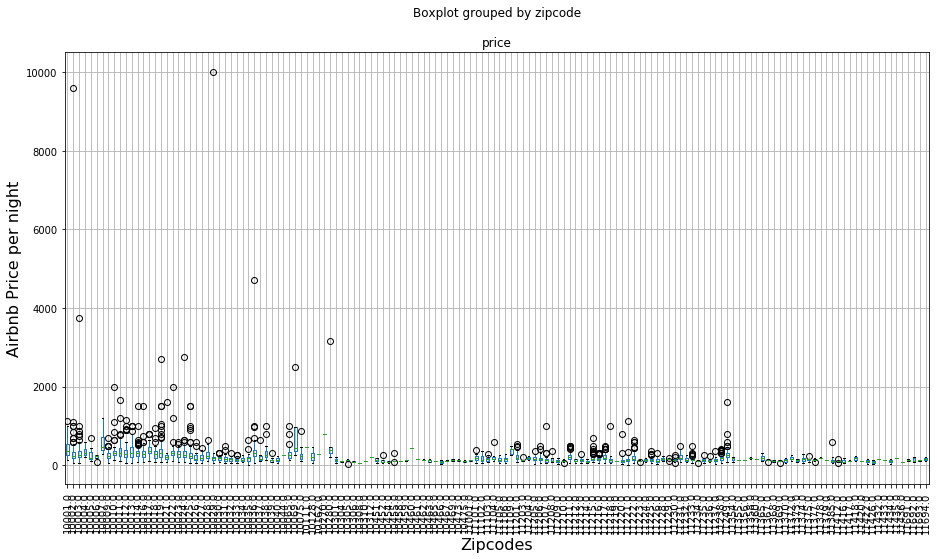

In [161]:
#Plotting a boxplot of price and zipcode columns for detecting outliers
fig_out = plt.figure(figsize=(15,8))
ax1 = fig_out.add_subplot(111)
air_NY_2_bed.boxplot(column='price',by='zipcode',ax=ax1)
ax1.tick_params('x',labelrotation = 90)
ax1.set_ylabel("Airbnb Price per night",fontsize = 16)
ax1.set_xlabel("Zipcodes", fontsize = 16)

In [162]:
#Selecting records with price values less than or equal to 6000
airbnb_zip_cleaned_out = air_NY_2_bed[air_NY_2_bed['price'] <= 6000]
airbnb=airbnb_zip_cleaned_out.copy()

Text(0.5, 0, 'Zipcodes')

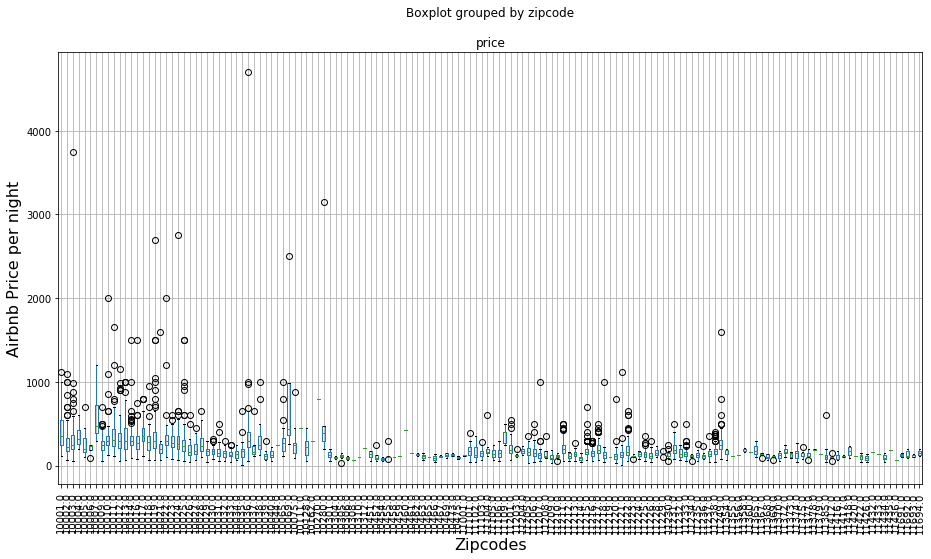

In [163]:
fig_out = plt.figure(figsize=(15,8))
ax1 = fig_out.add_subplot(111)
airbnb.boxplot(column='price',by='zipcode',ax=ax1)
ax1.tick_params('x',labelrotation = 90)
ax1.set_ylabel("Airbnb Price per night",fontsize = 16)
ax1.set_xlabel("Zipcodes", fontsize = 16)

In [ ]:
#Printing the summary of the cleaned AirBnB dataset
airbnb.info()

##                                     Data Loading- Zillow

In [ ]:
#Loading the Zillow dataset
data_zil=pd.read_csv('Zip_Zhvi_2bedroom.csv',dtype={'RegionName': str})
data_zil.shape

In [ ]:
#Printing the first 5 records in the loaded dataset
data_zil.head(5)

In [ ]:
#Creating a new DataFrame
df_zil = pd.DataFrame(data_zil)
df_zil.columns

##                                      Data Cleaning- Zillow

In [ ]:
#Dropping the less relevant columns
df_zil=df_zil.drop(columns=['RegionID','SizeRank','Metro', 'CountyName'],axis=1)
df_zil.columns

#### Duplicates

In [ ]:
#Printing and checking the duplicate values if there are any
print(f"Total number of duplicates : {df_zil.duplicated().sum()}")
print(f"Percentage of duplicates : {df_zil.duplicated().sum()/len(df_zil) * 100}%")

In [ ]:
#Checking for null values, printing their sum
df_zil.isnull().sum()

### New York Records

In [ ]:
#Selecting records only with New York data
df_zil=df_zil.loc[df_zil['City'].isin(['New York'])]

In [ ]:
df_zil.City.unique()

### Dropping Columns with Data from 1996-2007

In [ ]:
#Dropping columns containing records from years 1996-2007
zil_years=df_zil.loc[:,~df_zil.columns.str.contains('199|2000|2001|2002|2003|2004|2005|2006|2007')]

### Merging Columns with 'year-month' Data into 'year' Columns

In [ ]:
#Merging columns (year-month) containing the records from same year to a single column (year) using the mean values
zil_years['2008'] = zil_years[[col for col in zil_years.columns if '2008-' in col]].mean(axis = 1,skipna = True)
zil_years['2009'] = zil_years[[col for col in zil_years.columns if '2009-' in col]].mean(axis = 1,skipna = True)
zil_years['2010'] = zil_years[[col for col in zil_years.columns if '2010-' in col]].mean(axis = 1,skipna = True)
zil_years['2011'] = zil_years[[col for col in zil_years.columns if '2011-' in col]].mean(axis = 1,skipna = True)
zil_years['2012'] = zil_years[[col for col in zil_years.columns if '2012-' in col]].mean(axis = 1,skipna = True)
zil_years['2013'] = zil_years[[col for col in zil_years.columns if '2013-' in col]].mean(axis = 1,skipna = True)
zil_years['2014'] = zil_years[[col for col in zil_years.columns if '2014-' in col]].mean(axis = 1,skipna = True)
zil_years['2015'] = zil_years[[col for col in zil_years.columns if '2015-' in col]].mean(axis = 1,skipna = True)
zil_years['2016'] = zil_years[[col for col in zil_years.columns if '2016-' in col]].mean(axis = 1,skipna = True)
zil_years['2017'] = zil_years[[col for col in zil_years.columns if '2017-' in col]].mean(axis = 1,skipna = True)
#Dropping the columns with year-month data
zil_years_cleaned=zil_years.loc[:,~zil_years.columns.str.contains('-01|-02|-03|-04|-05|-06|-07|-08|-09|-10|-11|-12')]

In [ ]:
zil_years_cleaned.head(5)

In [ ]:
#Checking for any null values and returning the sum
zil_years_cleaned.isna().sum()

In [ ]:
zil_years_cleaned.shape

In [ ]:
#Renaming the column name "RegionName" to "zipcode"
zil_cleaned=zil_years_cleaned.rename(columns={"RegionName": "zipcode"})
#Dropping na values from zipcode column if there are any
zil_cleaned.dropna(subset=['zipcode'],inplace=True)

In [ ]:
#Casting the zipcode values to integer
zil_cleaned['zipcode'] = pd.to_numeric(zil_cleaned['zipcode'], downcast='integer')
zil_cleaned.zipcode.unique()

In [ ]:
zil_cleaned.columns

In [ ]:
zil_cleaned.shape

### Converting Wide Data to Long Data uisng Melt Function

In [ ]:
#Generating a new DataFrame with the index reset
zil_cleaned = zil_cleaned.reset_index()
#Converting the wide data to long data using melt function where identifier variable is the Zipcode column, 
#all 'year' columns as id_vars.
zillow =pd.melt(zil_cleaned, id_vars='zipcode', value_vars=[ '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017'])
print(zillow)

In [ ]:
#Creating a download link for the cleaned Zillow dataset
def create_download_link( zillow, title = "zillow.csv", filename = "zillow.csv"):  
    csv = zillow.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(zillow)

In [ ]:
#Creating a download link for the cleaned AirBnB dataset
def create_download_link( airbnb, title = "airbnb.csv", filename = "airbnb.csv"):  
    csv = airbnb.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(airbnb)

In [ ]:
zillow.shape

In [ ]:
airbnb.shape

### Merging Cleaned Datasets

In [ ]:
#Merging the two cleaned datasets on column 'zipcode'
final_data = zillow.merge(airbnb, on=['zipcode'])

In [ ]:
final_data

In [ ]:
#Renaming the column names "variable" to "year" and "value" to "median cost"
final_data=final_data.rename(columns={"variable": "year", "value":"median cost"})

In [ ]:
#Rounding the median cost value to two decimal values
final_data['median cost']=round(final_data['median cost'],2)
final_data['median cost'].unique()

In [ ]:
final_data.info()

### Occupancy Rate (Key Metrics)

In [ ]:
#Defining a method to calculate occupancy
final_data['occupancy']= round(((
    ((30-final_data['availability_30'])/30)+
                                 ((60-final_data['availability_60'])/60)+ 
                               ((90-final_data['availability_90'])/90)+ 
                                 ((365-final_data['availability_365'])/365))/4)*100,2)

#### Example: 'availability_30'=10, 'availability_60'=40, 'availability_90'=60, 'availability_365'=300
$$ Occupancy Rate= [(((30-10)/30)+((60-40)/60)+((90-60)/90)+((365-300)/365))/4]*100 $$
$$ Occupancy Rate= [((0.66)+(0.33)+(0.33)+(0.17))/4]*100 $$
$$ Occupancy Rate= [0.372]*100= 37.2% $$

In [ ]:
final_data.occupancy.unique()

In [ ]:
#Checking for values with 0 in occupancy column
final_data.loc[final_data['occupancy'] ==  0.  ]

In [ ]:
#Selecting records with occupancy greater than or equal to 1
final_data_occ = final_data[final_data['occupancy'] >= 1.0]
final_data_occ.head(5)

In [ ]:
#Selecting records with occupancy more than or equal to 60 as we are aiming at finidng most profitable zipcodes
#because more occupancy indicates more revenue and more revenue indicates more profits
final_data_occ = final_data_occ[final_data_occ['occupancy'] >= 60]

In [ ]:
final_data_occ['occupancy'].unique()

In [ ]:
#Totalling the price and cleaning_fee into a single column total_price
final_data_occ['total_price']=(final_data_occ['price']+final_data_occ['cleaning_fee'])

### Function 'yearly_revenue' (Key Metrics)

In [ ]:
#Defining a method to calculate yearly revenue
def yearly_revenue(final_data_occ):
    return round((365*(final_data_occ['occupancy']/100))*(final_data_occ['total_price']),2)

#### Example: occupany = 60%, total_price = 250
$$ Yearly Revenue=(365*(60/100)*(250))= 54750 $$

In [ ]:
#Applying the yearly_revenue function
final_data_occ['yearly_revenue'] = final_data_occ.apply(yearly_revenue, axis=1)

In [ ]:
#Printing the summary of the yearly_revenue column
final_data_occ['yearly_revenue'].describe()

In [ ]:
#Printing the maximum value in the column yearly_revenue
final_data_occ['yearly_revenue'].max()

### Function 'break_even' (Key Metrics)

In [ ]:
#Defining a function to calculate the break even time
def break_even(final_data_occ):
    return round((final_data_occ['median cost']/final_data_occ['yearly_revenue']),2)

#### Example: median_cost=200000, yearly_revenue= 150000
$$ BreakEven=(200000/150000)= 1.3 $$

In [ ]:
#Applying the function break_even
final_data_occ['break_even'] = final_data_occ.apply(break_even, axis=1)
final_data_occ['break_even'].groupby(final_data_occ['zipcode'])

In [ ]:
#Printing the summary of the column break_even
final_data_occ['break_even'].describe()

In [ ]:
cleaned=final_data_occ.copy()
cleaned.head(5)

### Box Plot- Zipcode vs Break Even Time

Text(0.5, 0, 'Zipcodes')

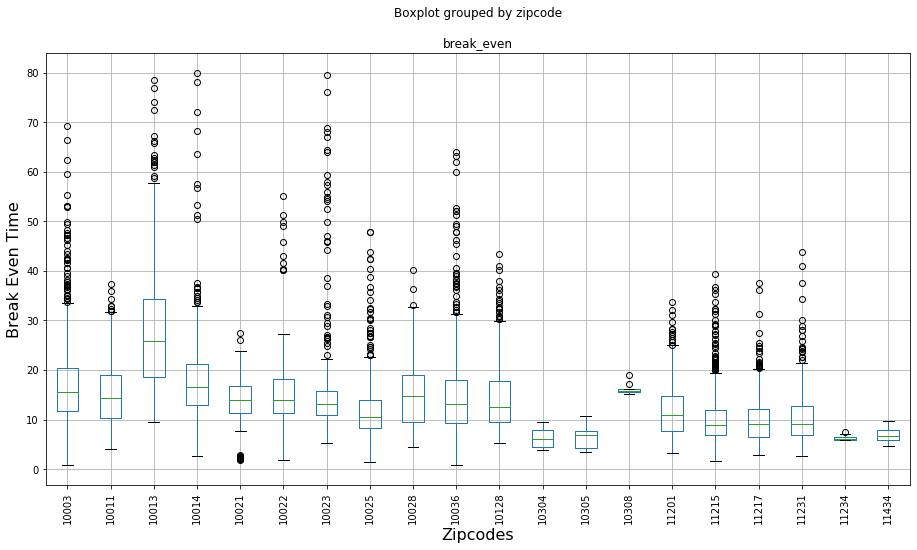

In [164]:
#Plotting a boxplot for the columns break_even and zipcode
fig_out = plt.figure(figsize=(15,8))
ax1 = fig_out.add_subplot(111)
cleaned.boxplot(column='break_even',by='zipcode',ax=ax1)
ax1.tick_params('x',labelrotation = 90)
ax1.set_ylabel("Break Even Time",fontsize = 16)
ax1.set_xlabel("Zipcodes", fontsize = 16)

In [ ]:
cleaned.describe()

In [ ]:
cleaned.to_csv( "cleaned.csv", index=False, encoding='utf-8-sig')

In [ ]:
#Creatinf a download link for the final cleaned dataset
from IPython.display import HTML
import base64
def create_download_link( cleaned, title = "Download CSV file", filename = "cleaned.csv"):  
    csv = cleaned.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(cleaned)

##                                       Data Visualizations

### Bar Plot- Regions vs Number of Zipcodes

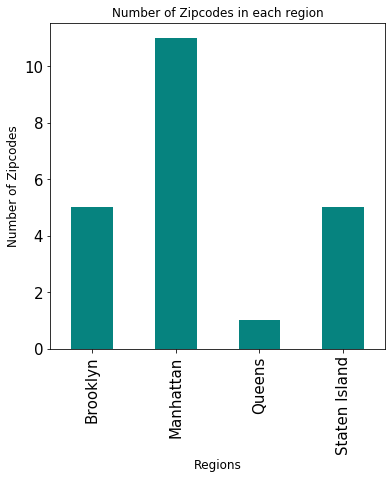

In [165]:
#plotting a bar graph for the columns 
fig1 = plt.figure(figsize=(6,6))
ax1 = fig1.add_subplot(111)
my_colors = list(islice(cycle(['#06837F', '#02CECB', '#B4FFFF', '#FED811', 
                               '#FDC100']), None, len(cleaned.neighbourhood_group_cleansed)))
final_data.groupby('neighbourhood_group_cleansed').agg({'zipcode' : 'nunique'}).plot(
    kind = 'bar',ax=ax1,stacked=True, color=my_colors, legend=False)
ax1.set_ylabel("Number of Zipcodes", fontsize='large')
ax1.set_xlabel("Regions",fontsize='large')
ax1.set_title("Number of Zipcodes in each region")
ax1.tick_params(axis='both', which='major', labelsize=15)

In [166]:
#Assigning the colors to the patches
neighborhood_colors_airbnb = {'Manhattan' : '#ffbaba','Brooklyn' : '#ff5252', 'Queens' : '#ff0000', 'Staten Island' : '#a70000'}
red_patch = mpatches.Patch(color='#ffbaba', label='Manhattan')
blue_patch = mpatches.Patch(color='#ff5252', label='Brooklyn')
green_patch = mpatches.Patch(color='#ff0000', label='Queens')
magenta_patch = mpatches.Patch(color='#a70000', label='Staten Island')
a_handle = [red_patch, blue_patch, green_patch, magenta_patch]

### Scatter Plot- Number of Reviews for Location vs AirBnB Prices

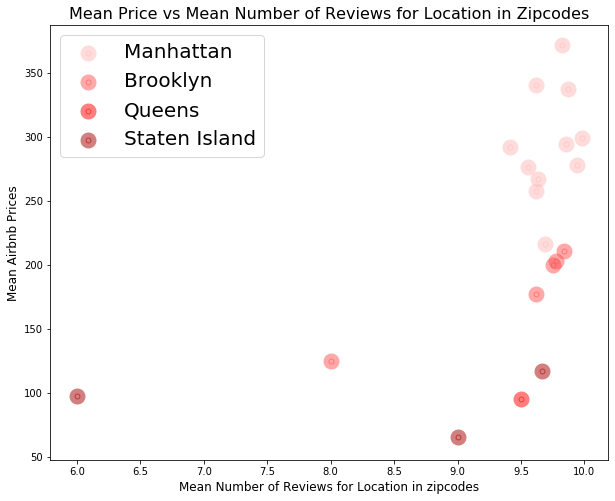

In [167]:
#Plotting a scatter plot for the columns 
reviewcount_vs_price = cleaned.groupby(['zipcode','neighbourhood_group_cleansed'], 
                    as_index=False).agg({'price' : 'mean', 'review_scores_location' : 'mean'})
fig2 = plt.figure(figsize=(10,8))
ax1 = fig2.add_subplot(111)
for neighborhood in neighborhood_colors_airbnb:
    ax1.scatter(reviewcount_vs_price[reviewcount_vs_price['neighbourhood_group_cleansed']
                ==neighborhood]['review_scores_location'],reviewcount_vs_price[
                reviewcount_vs_price['neighbourhood_group_cleansed']==neighborhood]['price'],label 
                = neighborhood,linewidths=10, alpha = 0.5, color = neighborhood_colors_airbnb[neighborhood])
ax1.set_ylabel('Mean Airbnb Prices', fontsize = 'large')
ax1.set_xlabel('Mean Number of Reviews for Location in zipcodes',fontsize = 'large')
ax1.set_title("Mean Price vs Mean Number of Reviews for Location in Zipcodes", fontsize = 16)
ax1.legend(prop={'size': 20})

### Bar Plot- Count of Properties vs Zipcodes

Text(0.5, 1.0, 'Number of properties')

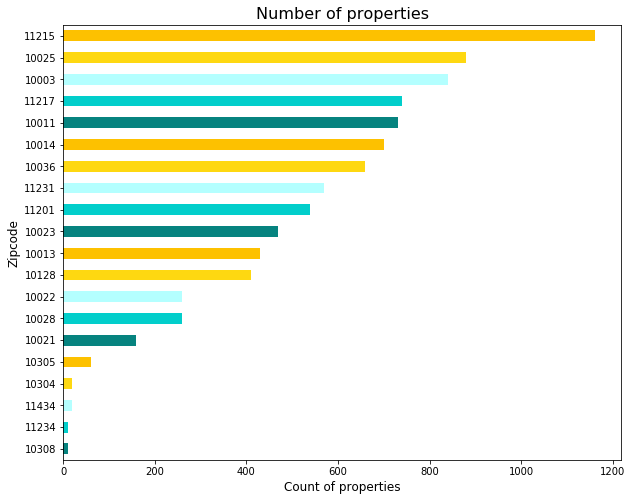

In [168]:
#Plotting a bar graph for the columns 
fig3 = plt.figure(figsize=(10,8))
ax1 = fig3.add_subplot(111)
my_colors = list(islice(cycle(['#06837F', '#02CECB', '#B4FFFF', '#FED811', 
                               '#FDC100']), None, len(cleaned.zipcode)))
cleaned.zipcode.value_counts().sort_values().plot(kind = 'barh', stacked=True, color=my_colors)
ax1.set_ylabel('Zipcode', fontsize = 'large')
ax1.set_xlabel('Count of properties',fontsize = 'large')
ax1.set_title("Number of properties", fontsize = 16)